<a href="https://colab.research.google.com/github/NeyBastos/Desenvolvimento/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Engenharia_de_Software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Uma Visão de Engenharia de Software

In [11]:
print('Hello World!')

Hello World!


In [12]:
x = 5
if (x >=5):
    print('Correto')

Correto


In [22]:
x = 4
if (x >=5):
  print('Correto')
elif(x < 3):
  print('Incorreto')
elif(x==4):
  print('Luiz Ney')



Luiz Ney


In [32]:
assert sum([ 2, 3, 5]) == 10

# Aula 2 - Modelos de Processo

In [33]:
n = 100
sum_all = 0

for i in range(1, n + 1):
    sum_all = sum_all + i

print(sum_all)  # 55

5050


In [ ]:
n = 10
sum_all = sum(range(1, n + 1))

print(sum_all)  # 55

In [ ]:
# This is bad
# represents the number of active users
au = 55

# This is good
active_user_amount = 55

In [ ]:
# This is bad
c = 5
d = 12

# This is good
city_counter = 5
elapsed_time_in_days = 12

In [ ]:
import random

# This is bad
def roll():
    return random.randint(0, 36)  # what is 36 supposed to represent?

# This is good
ROULETTE_POCKET_COUNT = 36

def roll():
    return random.randint(0, ROULETTE_POCKET_COUNT)

In [ ]:
# This is good
score_list = [12, 33, 14, 24]
word_dict = {
    'a': 'apple',
    'b': 'banana',
    'c': 'cherry',
}

In [ ]:
numbers = [1, 2, 3, 4, 5]

# This variable stores the average of list of numbers.
average = sum(numbers) / len(numbers)
print(average)

TypeError: ignored

# Aula 3 - Princípios que Orientam a Prática

In [ ]:
class Animal:
    def __init__(self, name: str):
            self.name = name

    def get_name(self):
        pass


class AnimalDB:
    def get_animal(self) -> Animal:
        pass

    def save(self, animal: Animal):
        pass

"""
When designing our classes, we should aim to put related features together,
so whenever they tend to change they change for the same reason.
And we should try to separate features if they will change for different reasons. - Steve Fenton
"""

In [ ]:
"""
Single Responsibility Principle
“…You had one job” — Loki to Skurge in Thor: Ragnarok
A class should have only one job.
If a class has more than one responsibility, it becomes coupled.
A change to one responsibility results to modification of the other responsibility.
"""

class Animal:
    def __init__(self, name: str):
        self.name = name

    def get_name(self) -> str:
        pass

    def save(self, animal: Animal):
        pass

"""
The Animal class violates the SRP.
How does it violate SRP?
SRP states that classes should have one responsibility, here, we can draw out two responsibilities: animal database management and animal properties management.
The constructor and get_name manage the Animal properties while the save manages the Animal storage on a database.
How will this design cause issues in the future?
If the application changes in a way that it affects database management functions. The classes that make use of Animal properties will have to be touched and recompiled to compensate for the new changes.
You see this system smells of rigidity, it’s like a domino effect, touch one card it affects all other cards in line.
To make this conform to SRP, we create another class that will handle the sole responsibility of storing an animal to a database:
"""

In [ ]:
"""
Open-Closed Principle
Software entities(Classes, modules, functions) should be open for extension, not modification.
"""
class Animal:
    def __init__(self, name: str):
        self.name = name

    def get_name(self) -> str:
        pass

animals = [
    Animal('lion'),
    Animal('mouse')
]

def animal_sound(animals: list):
    for animal in animals:
        if animal.name == 'lion':
            print('roar')

        elif animal.name == 'mouse':
            print('squeak')

animal_sound(animals)

"""
The function animal_sound does not conform to the open-closed principle because it cannot be closed against new kinds of animals.
If we add a new animal, Snake, We have to modify the animal_sound function.
You see, for every new animal, a new logic is added to the animal_sound function.
This is quite a simple example. When your application grows and becomes complex,
you will see that the if statement would be repeated over and over again
in the animal_sound function each time a new animal is added, all over the application.
"""

animals = [
    Animal('lion'),
    Animal('mouse'),
    Animal('snake')
]

def animal_sound(animals: list):
    for animal in animals:
        if animal.name == 'lion':
            print('roar')
        elif animal.name == 'mouse':
            print('squeak')
        elif animal.name == 'snake':
            print('hiss')

animal_sound(animals)


"""
How do we make it (the animal_sound) conform to OCP?
"""

class Animal:
    def __init__(self, name: str):
        self.name = name

    def get_name(self) -> str:
        pass

    def make_sound(self):
        pass


class Lion(Animal):
    def make_sound(self):
        return 'roar'


class Mouse(Animal):
    def make_sound(self):
        return 'squeak'


class Snake(Animal):
    def make_sound(self):
        return 'hiss'


def animal_sound(animals: list):
    for animal in animals:
        print(animal)

animal_sound(animals)

"""
Animal now has a virtual method make_sound. We have each animal extend the Animal class and implement the virtual make_sound method.
Every animal adds its own implementation on how it makes a sound in the make_sound.
The animal_sound iterates through the array of animal and just calls its make_sound method.
Now, if we add a new animal, animal_sound doesn’t need to change.
All we need to do is add the new animal to the animal array.
animal_sound now conforms to the OCP principle.
"""

"""
Another example:
Let’s imagine you have a store, and you give a discount of 20% to your favorite customers using this class:
When you decide to offer double the 20% discount to VIP customers. You may modify the class like this:
"""

class Discount:
    def __init__(self, customer, price):
        self.customer = customer
        self.price = price

    def give_discount(self):
            if self.customer == 'fav':
                return self.price * 0.2
            if self.customer == 'vip':
                return self.price * 0.4


"""
No, this fails the OCP principle. OCP forbids it. If we want to give a new percent discount maybe, to a diff.
type of customers, you will see that a new logic will be added.
To make it follow the OCP principle, we will add a new class that will extend the Discount.
In this new class, we would implement its new behavior:
"""

class Discount:
    def __init__(self, customer, price):
        self.customer = customer
        self.price = price

    def get_discount(self):
            return self.price * 0.2


class VIPDiscount(Discount):
    def get_discount(self):
        return super().get_discount() * 2

"""
If you decide 80% discount to super VIP customers, it should be like this:
You see, extension without modification.
"""

class SuperVIPDiscount(VIPDiscount):
    def get_discount(self):
        return super().get_discount() * 2

In [ ]:
"""
Liskov Substitution Principle
A sub-class must be substitutable for its super-class.
The aim of this principle is to ascertain that a sub-class can assume the place of its super-class without errors.
If the code finds itself checking the type of class then, it must have violated this principle.
Let’s use our Animal example.
"""

def animal_leg_count(animals: list):
    for animal in animals:
        if isinstance(animal, Lion):
            print(lion_leg_count(animal))
        elif isinstance(animal, Mouse):
            print(mouse_leg_count(animal))

animal_leg_count(animals)

"""
To make this function follow the LSP principle, we will follow this LSP requirements postulated by Steve Fenton:
If the super-class (Animal) has a method that accepts a super-class type (Animal) parameter.
Its sub-class(Pigeon) should accept as argument a super-class type (Animal type) or sub-class type(Pigeon type).
If the super-class returns a super-class type (Animal).
Its sub-class should return a super-class type (Animal type) or sub-class type(Pigeon).
Now, we can re-implement animal_leg_count function:
"""

def animal_leg_count(animals: list):
    for animal in animals:
        print(animal)

animal_leg_count(animals)

"""
The animal_leg_count function cares less the type of Animal passed, it just calls the leg_count method.
All it knows is that the parameter must be of an Animal type, either the Animal class or its sub-class.
The Animal class now have to implement/define a leg_count method.
And its sub-classes have to implement the leg_count method:
"""

class Animal:
    def leg_count(self):
        pass


class Lion(Animal):
    def leg_count(self):
        pass


"""
When it’s passed to the animal_leg_count function, it returns the number of legs a lion has.
You see, the animal_leg_count doesn’t need to know the type of Animal to return its leg count,
it just calls the leg_count method of the Animal type because by contract a sub-class of Animal class must implement the leg_count function.
"""

In [ ]:
"""
Interface Segregation Principle
Make fine grained interfaces that are client specific
Clients should not be forced to depend upon interfaces that they do not use.
This principle deals with the disadvantages of implementing big interfaces.
Let’s look at the below IShape interface:
"""

class IShape:
    def draw_square(self):
        raise NotImplementedError

    def draw_rectangle(self):
        raise NotImplementedError

    def draw_circle(self):
        raise NotImplementedError

"""
This interface draws squares, circles, rectangles. class Circle, Square or Rectangle implementing the IShape
interface must define the methods draw_square(), draw_rectangle(), draw_circle().
"""

class Circle(IShape):
    def draw_square(self):
        pass

    def draw_rectangle(self):
        pass

    def draw_circle(self):
        pass

class Square(IShape):
    def draw_square(self):
        pass

    def draw_rectangle(self):
        pass

    def draw_circle(self):
        pass

class Rectangle(IShape):
    def draw_square(self):
        pass

    def draw_rectangle(self):
        pass

    def draw_circle(self):
        pass

"""
It’s quite funny looking at the code above. class Rectangle implements methods (draw_circle and draw_square) it has no use of,
likewise Square implementing draw_circle, and draw_rectangle, and class Circle (draw_square, draw_rectangle).
If we add another method to the IShape interface, like draw_triangle(),
"""

class IShape:
    def draw_square(self):
        raise NotImplementedError

    def draw_rectangle(self):
        raise NotImplementedError

    def draw_circle(self):
        raise NotImplementedError

    def draw_triangle(self):
        raise NotImplementedError


"""
the classes must implement the new method or error will be thrown.
We see that it is impossible to implement a shape that can draw a circle but not a rectangle or a square or a triangle.
We can just implement the methods to throw an error that shows the operation cannot be performed.
ISP frowns against the design of this IShape interface. clients (here Rectangle, Circle, and Square) should not be forced to depend on methods that they do not need or use.
Also, ISP states that interfaces should perform only one job (just like the SRP principle) any extra grouping of behavior should be abstracted away to another interface.
Here, our IShape interface performs actions that should be handled independently by other interfaces.
To make our IShape interface conform to the ISP principle, we segregate the actions to different interfaces.
Classes (Circle, Rectangle, Square, Triangle, etc) can just inherit from the IShape interface and implement their own draw behavior.
"""

class IShape:
    def draw(self):
        raise NotImplementedError

class Circle(IShape):
    def draw(self):
        pass

class Square(IShape):
    def draw(self):
        pass

class Rectangle(IShape):
    def draw(self):
        pass

"""
We can then use the I -interfaces to create Shape specifics like Semi Circle, Right-Angled Triangle, Equilateral Triangle, Blunt-Edged Rectangle, etc.
"""

# Aula 4 - Conceitos de Projeto

In [ ]:
class SingletonClass(object):
  def __new__(cls):
    if not hasattr(cls, 'instance'):
      cls.instance = super(SingletonClass, cls).__new__(cls)
    return cls.instance

singleton = SingletonClass()
new_singleton = SingletonClass()

print(singleton is new_singleton)

singleton.singl_variable = "Singleton Variable"
print(new_singleton.singl_variable)

In [ ]:
#Using the Force formula F=ma

while True:
  mass = int(input("Enter the mass value: "))
  if mass > 0:
    break
while True:
  acceleration = int(input("Enter the acceleration: "))
  if acceleration > 0:
    break
print("The Force is", mass * acceleration)

In [ ]:
#REFACTORED code

def input_positive_integer(prompt):
  while True:
    input_value = int(input(prompt))
    if input_value > 0:
      return input_value
mass = input_positive_integer("Enter the mass: ")
acceleration = input_positive_integer("Enter the acceleration: ")
print("The Force is", mass * acceleration)

# Aula 5 - Projeto de Arquitetura

In [ ]:
# Wrong:

# Further indentation required as indentation is not distinguishable.
def long_function_name(
    var_one, var_two, var_three,
    var_four):
    print(var_one)

var_one = 1
var_two = 2
var_three = 3
var_four = 4

# Arguments on first line forbidden when not using vertical alignment.
foo = long_function_name(var_one, var_two,
    var_three, var_four)

1


In [ ]:
# Correct:

# Aligned with opening delimiter.
foo = long_function_name(var_one, var_two,
                         var_three, var_four)

# Add 4 spaces (an extra level of indentation) to distinguish arguments from the rest.
def long_function_name(
        var_one, var_two, var_three,
        var_four):
    print(var_one)

# Hanging indents should add a level.
foo = long_function_name(
    var_one, var_two,
    var_three, var_four)

1
1


In [ ]:
# Wrong:
import sys, os

In [ ]:
# Correct:
import os
import sys

In [ ]:
# server.py
%%file server.py

from flask import Flask
from flask_restplus import Resource, Api
app = Flask("app_name")
@app.route('/test')
@api.doc(params={})
class TestApp(Resource):
    def get():
        return 'Hello, World!'
if __name__ == "__main__":
    app.run(host=HOSTNAME, debug=True)

Writing server.py


In [ ]:
# client.py
%%file client.py

import requests
response = requests.get("https://abc.com/def/hello") #simple GET req
json_response = response.json() #response parsed in JSON

Writing client.py


# Aula 6 - Projeto de Componentes

In [ ]:
# arithmetic.py
%%file arithmetic.py

def add(x, y):
    return x + y

def divide(x, y):
    return x / y

def multiply(x, y):
    return x * y

def subtract(x, y):
    return x - y

Writing arithmetic.py


In [ ]:
# test_arithmetic.py
%%file test_arithmetic.py

import arithmetic
import unittest

class TestArithmetic(unittest.TestCase):

    def test_addition(self):
        self.assertEqual(arithmetic.add(1, 2), 3)

    def test_subtraction(self):
        self.assertEqual(arithmetic.subtract(2, 1), 1)

    def test_multiplication(self):
        self.assertEqual(arithmetic.multiply(5, 5), 25)

    def test_division(self):
        self.assertEqual(arithmetic.divide(8, 2), 4)

if __name__ == '__main__':
    unittest.main()

In [ ]:
from abc import ABC, abstractmethod
from dataclasses import dataclass

@dataclass
class KeyReader:
    no_key: bool
    key_inside = bool
    key_turned = bool
    key_ejected = bool

class Console():

    def __init__(self):
        self.state = "ON"
        self.status = None

    def service(self,state):
        K = KeyReader()
        while self.state == "ON":
            self.status = K.no_key

In [ ]:
from abc import ABC, abstractmethod

class Utility(ABC):

    @abstractmethod
    def check_currency(self):
        pass

    @abstractmethod
    def parse_user_entry(self):
        pass

    @abstractmethod
    def convert_list_to_string(self):
        pass

# Aula 7 - Conceitos de Qualidade

In [ ]:
def is_even(number):
    if number % 2 == 0:
        number_type = "Even"
    else:
        number_type = "Odd"
    print(number_type)

In [ ]:
def combining_lists():
    list_1 = [1, "a"]
    list_2 = [1, 2, 3]
    list_3 = ["c", "d"]

    list_of_lists = [list_1, list_2, list_3]
    joined_lists = []

    for i in len(list_of_lists):
        joined_lists.append(list_of_lists[i])

    print(joined_lists)

In [ ]:
# Example 1
def sumOfPrimes(max):
    total = 0
    for i in range(1, max):  # + 1
        for j in range(2, j):  # + 2
            if i % j == 0:  # + 3
                break
            j = j + 1
        total = total + 1
        i = i + 1
    return total  # Total Cognitive Complexity = 6

In [ ]:
# Example 2
def getWords(number):  # + 1
    if number == 1:  # + 1
        return "one"
    elif number == 2:  # + 1
        return "a couple"
    elif number == 3:  # + 1
        return "a few"
    else:
        return "lots"  # Total Cognitive Complexity = 4

In [ ]:
class GildedRose:
    def update_quality(self):
        for item in self.items:  # + 1
            if (
                item.name != "Aged Brie"
                and item.name != "Backstage passes to a TAFKAL80ETC concert"
            ):  # + 2
                if item.quality > 0:  # + 3
                    if item.name != "Sulfuras, Hand of Ragnaros":  # + 4
                        item.quality = item.quality - 1
            else:
                if item.quality < 50:  # + 3
                    item.quality = item.quality + 1
                    if item.name == "Backstage passes to a TAFKAL80ETC concert":  # + 4
                        if item.sell_in < 11:  # + 5
                            if item.quality < 50:  # + 6
                                item.quality = item.quality + 1
                        if item.sell_in < 6:  # + 5
                            if item.quality < 50:  # + 6
                                item.quality = item.quality + 1
            if item.name != "Sulfuras, Hand of Ragnaros":  # + 2
                item.sell_in = item.sell_in - 1
            if item.sell_in < 0:  # + 2
                if item.name != "Aged Brie":  # + 3
                    if item.name != "Backstage passes to a TAFKAL80ETC concert":  # + 4
                        if item.quality > 0:  # + 5
                            if item.name != "Sulfuras, Hand of Ragnaros":  # + 6
                                item.quality = item.quality - 1
                    else:  # + 4
                        item.quality = item.quality - item.quality
                else:
                    if item.quality < 50:  # + 4
                        item.quality = item.quality + 1


# Total Cognitive Complexity = 69

In [ ]:
def update_quality(self):
    for item in self.items:  # + 1
        if item.name == "Sulfuras, Hand of Ragnaros":  # + 2
            continue
        if item.name == "Aged Brie":  # + 2
            if item.quality < 50:  # + 3
                item.quality = item.quality + 1
            if item.sell_in < 1 and item.quality < 50:  # + 3
                item.quality = item.quality + 1
        elif item.name == "Backstage passes to a TAFKAL80ETC concert":  # + 2
            if item.quality < 50:  # + 4
                item.quality = item.quality + 1
            if item.sell_in < 11 and item.quality < 50:  # + 4
                item.quality = item.quality + 1
            if item.sell_in < 6 and item.quality < 50:  # + 4
                item.quality = item.quality + 1
            if item.sell_in < 1:  # + 4
                item.quality = item.quality - item.quality
        else:
            if item.quality > 0:  # + 3
                item.quality = item.quality - 1
            if item.sell_in < 1 and item.quality > 0:  # + 3
                item.quality = item.quality - 1
        item.sell_in = item.sell_in - 1


# Total Cognitive Complexity = 35

In [ ]:
!pip -q install pytest pytest-sugar

In [ ]:
# move to tdd directory
from pathlib import Path
if Path.cwd().name != 'tdd':
    %mkdir tdd
    %cd tdd

%pwd

In [ ]:
# cleanup all files
%rm *.py

In [ ]:
%%file test_math.py

import math
def test_add():
    assert 1+1 == 2

def test_mul():
    assert 6*7 == 42

def test_sin():
    assert math.sin(0) == 0

In [ ]:
!python -m pytest test_math.py

# Aula 8 - Estratégias de Teste de Software

In [ ]:
def cuboid_volume(l):
    return (l*l*l)

In [ ]:
length = [2,1.1, -2.5, 2, 3]

In [ ]:
for i in range(len(length)):
    print ("The volume of cuboid:",cuboid_volume(length[i]))

TypeError: ignored

In [ ]:
import unittest

In [ ]:
class TestCuboid(unittest.TestCase):
    def test_volume(self):
        self.assertAlmostEqual(cuboid_volume(2),8)
        self.assertAlmostEqual(cuboid_volume(1),1)
        self.assertAlmostEqual(cuboid_volume(0),0)
        self.assertAlmostEqual(cuboid_volume(5.5),166.375)

# Aula 9 - Gestão de Configuração de Software

In [ ]:
!git clone https://github.com/gomede/phoenix.git

%cd /content/phoenix

In [ ]:
!git pull

In [ ]:
!git status

In [ ]:
!git log -n 4

# Aula 10 - Métricas de Produto

In [ ]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

In [ ]:
%%pycodestyle
a= 1

In [ ]:
%%pycodestyle
(lambda f, n: f(f, n))(lambda f, n: [(not n % 3 and "fizz" or "") + (not n % 5 and "buzz" or "") or n] + f(f, n+1) if n <= 100 else [], 1)

In [ ]:
%%pycodestyle
def foo(bar=[]):        # bar is optional and defaults to [] if not specified
  bar.append("baz")    # but this line could be problematic, as we'll see...
  return bar

In [ ]:
%%pycodestyle
def foo(bar=None):
  if bar is None:		# or if not bar:
    bar = []
    bar.append("baz")
  return bar

In [ ]:
!pip install pylint

In [ ]:
%%file test_math.py

import math
def test_add():
    assert 1+1 == 2

def test_mul():
    assert 6*7 == 42

def test_sin():
    assert math.sin(0) == 0

In [ ]:
!python -m pylint test_math.py

In [ ]:
%%file test_complex.py

def update_quality(self):
    for item in self.items:  # + 1
        if item.name == "Sulfuras, Hand of Ragnaros":  # + 2
            continue
        if item.name == "Aged Brie":  # + 2
            if item.quality < 50:  # + 3
                item.quality = item.quality + 1
            if item.sell_in < 1 and item.quality < 50:  # + 3
                item.quality = item.quality + 1
        elif item.name == "Backstage passes to a TAFKAL80ETC concert":  # + 2
            if item.quality < 50:  # + 4
                item.quality = item.quality + 1
            if item.sell_in < 11 and item.quality < 50:  # + 4
                item.quality = item.quality + 1
            if item.sell_in < 6 and item.quality < 50:  # + 4
                item.quality = item.quality + 1
            if item.sell_in < 1:  # + 4
                item.quality = item.quality - item.quality
        else:
            if item.quality > 0:  # + 3
                item.quality = item.quality - 1
            if item.sell_in < 1 and item.quality > 0:  # + 3
                item.quality = item.quality - 1
        item.sell_in = item.sell_in - 1


# Total Cognitive Complexity = 35

In [ ]:
!python -m pylint --const-rgx='[a-z\_][a-z0-9\_]{2, 30}$' test_complex.py

In [ ]:
!python -m pylint --version

# Aula 11 - Métricas de Processo e Projeto

In [ ]:
def add_string_with_plus(iters):
    s = ""
    for i in range(iters):
        s += "xyz"
    assert len(s) == 3*iters

def add_string_with_format(iters):
    fs = "{}"*iters
    s = fs.format(*(["xyz"]*iters))
    assert len(s) == 3*iters

def add_string_with_join(iters):
    l = []
    for i in range(iters):
        l.append("xyz")
    s = "".join(l)
    assert len(s) == 3*iters

def convert_list_to_string(l, iters):
    s = "".join(l)
    assert len(s) == 3*iters

In [ ]:
timeit(add_string_with_plus(10000))

In [ ]:
timeit(add_string_with_format(10000))

In [ ]:
timeit(add_string_with_join(10000))

In [ ]:
l = ["xyz"]*10000

In [ ]:
timeit(convert_list_to_string(l, 10000))

# Aula 12 - Estimativas de Projeto de Software

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [ ]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [ ]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [ ]:
cost_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
cost_target_prob = [.3, .3, .2, .1, .05, .05]
cost_target = np.random.choice(cost_target_values, num_reps, p=cost_target_prob)

In [ ]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Cost_Target': cost_target})

df['Cost'] = df['Pct_To_Target'] * df['Cost_Target']

In [ ]:
df

In [ ]:
def calc_salary_rate(x):
    """ Return the salary rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [ ]:
df['Salary_Rate'] = df['Pct_To_Target'].apply(calc_salary_rate)
df['Salary_Amount'] = df['Salary_Rate'] * df['Cost']

In [ ]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(cost_target_values, num_reps, p=cost_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Cost_Target': cost_target})

    # Back into the sales number using the percent to target rate
    df['Cost'] = df['Pct_To_Target'] * df['Cost_Target']

    # Determine the salarys rate and calculate it
    df['Salary_Rate'] = df['Pct_To_Target'].apply(calc_salary_rate)
    df['Salary_Amount'] = df['Salary_Rate'] * df['Cost']

    # We want to track sales,salary amounts and sales targets over all the simulations
    all_stats.append([df['Cost'].sum().round(0),
                      df['Salary_Amount'].sum().round(0),
                      df['Cost_Target'].sum().round(0)])

In [ ]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Cost',
                                                           'Salary_Amount',
                                                           'Cost_Target'])

NameError: ignored

In [ ]:
results_df.describe().style.format('{:,}')

In [ ]:
df.plot.hist()

In [ ]:
df.plot.hist(bins=12, alpha=0.5)

# Aula 13 - Seu Primeiro Programa Python

In [ ]:
print("Welcome to Python V2!")

Welcome to Python V2!


In [ ]:
x = 2.5

type(x)

float

In [ ]:
print(x*5)

12.5


In [ ]:
print(str(type(pow(2,3)))*5)

<class 'int'><class 'int'><class 'int'><class 'int'><class 'int'>


Aspectos fundamentais:


1.   Python é uma linguagem predominantemente funcional -> f() -> fn(f3(f2(f1())))
2.   Python é uma linguagem fracamente tipada -> tipo da variável modofica com a atribuição



In [ ]:
print("Welcome")
print("to Python!")

Welcome
to Python!


In [ ]:
print("Welcome \n to Python!")

Welcome 
 to Python!


In [ ]:
1 + 1 * 2.8

3.8

In [ ]:
1 + (1 * 2)

3

In [ ]:
(1 + 1) * 2

4

In [ ]:
phrase = "Hello, world"
print(phrase)

Hello, world


In [ ]:
s = 3600

In [ ]:
seconds = 3600

In [ ]:
seconds_per_hour = 3600

In [ ]:
phrase = "Hello, world" # This comment is PEP 8 compliant.
print(phrase) # This comment isn't.

Hello, world


In [ ]:
"""
Este código precisa de dois argumentos do tipo inteiro
"""

10 * 10

100

In [ ]:
n = 7.125
f"The value of n is {n}"

'The value of n is 7.125'

In [ ]:
n = 7.125
print("The value of n is " + str(n))

In [ ]:
n = 7.125
f"The value of n is {n:.2f}"

In [ ]:
balance = 2000.0
spent = 256.35
remaining = balance - spent
f"After spending ${spent:.3f}, I was left with ${remaining:,.3f}, {balance:,.3f}"

'After spending $256.350, I was left with $1,743.650, 2,000.000'

In [ ]:
ratio = 0.91123456789
f"Over {ratio:.100%} of Pythonistas say 'Real Python rocks!'"

Vantagens:


1.   Pouco código
2.   Funcional
3.   Interpretada/Compilada
4.   Várias bibliotecas (matemática, gráficos, IA, DS, ML, DL, ...)
5.   Vários tipos de software (web, IA, mobile, desktop, api, ...)
6.   Curva de aprendizagem



In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(x=["a","b","c","d"],y=[1, 2, 3, 2], title="Gráfico")
fig.show()

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Aula 14 - Strings e Métodos de String

In [ ]:
"Hello World!"

'Hello World!'

In [ ]:
type("Hello, world")

str

In [ ]:
type("Hello, world1@")

str

In [ ]:
phrase = "Hello, world"
type(phrase)

str

In [ ]:
x = 1.0
type(x)

float

In [ ]:
string1 = 'Hello, world'
string2 = "1234"

In [ ]:
len(string2)

4

In [ ]:
len(string2)

4

In [ ]:
paragraph = "This planet has - or rather had - a problem, which was \
this: most of the people living on it were unhappy for pretty much \
of the time. Many solutions were suggested for this problem, but \
most of these were largely concerned with the movements of small \
green pieces of paper, which is odd because on the whole it wasn't \
the small green pieces of paper that were unhappy."

paragraph

"This planet has - or rather had - a problem, which was this: most of the people living on it were unhappy for pretty much of the time. Many solutions were suggested for this problem, but most of these were largely concerned with the movements of small green pieces of paper, which is odd because on the whole it wasn't the small green pieces of paper that were unhappy."

In [ ]:
s = "Line1\nLine2 \nLine3"

print(s)

Line1
Line2 
Line3


In [ ]:
x = {"Nome" : "Luiz"}
x = {"Custo" : 10.00}
type(x)

dict

In [ ]:
print(paragraph)

This planet has - or rather had - a problem, which was this: most of the people living on it were unhappy for pretty much of the time. Many solutions were suggested for this problem, but most of these were largely concerned with the movements of small green pieces of paper, which is odd because on the whole it wasn't the small green pieces of paper that were unhappy.


In [ ]:
string1 = "abra"
string2 = "cadabra"

magic_string = string1 + string2
magic_string

'abracadabra'

In [ ]:
first_name = "Arthur"
last_name = "Dent"
full_name = "Your First Namen is : " + first_name + " " + last_name
full_name
print(full_name)

Your First Namen is : Arthur Dent


In [ ]:
flavor = "Luiz pie"
flavor[0]

'L'

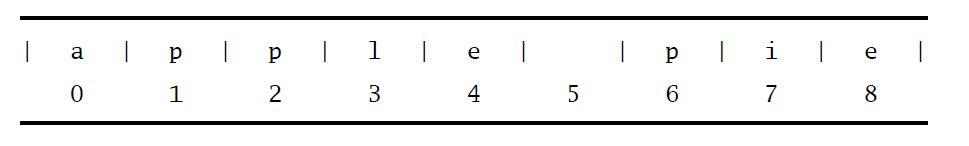

In [ ]:
flavor[-1]

'e'

In [ ]:
vector = "abcd 0005 tb tddoo 99 88"

In [ ]:
vector[1:20] + vector[6:10]

'bcd 0005 tb tddoo 9005 '

In [ ]:
first_three_letters = flavor[0] + flavor[1] + flavor[2]
first_three_letters

'app'

In [ ]:
flavor = "apple pie"
flavor[0:3]

'app'

In [ ]:
flavor[:5]

'apple'

In [ ]:
flavor[-5:]

'e pie'

In [ ]:
flavor[:]

'apple pie'

In [ ]:
len(flavor)

9

In [ ]:
flavor[0:9]

'apple pie'

In [ ]:
"Jean-luc Picard".lower()

'jean-luc picard'

In [ ]:
name = "Jean-luc Picard"
name.lower()

'jean-luc picard'

In [ ]:
name.count("a")

2

In [ ]:
loud_voice = "Can you hear me yet?"
loud_voice.upper()

'CAN YOU HEAR ME YET?'

In [ ]:
name = "Jean-luc Picard          "
name.rstrip()

'Jean-luc Picard'

In [ ]:
name = "           Jean-luc Picard"
name.lstrip()

'Jean-luc Picard'

In [ ]:
name = " Jean-luc Picard "
name.strip()

'Jean-luc Picard'

In [ ]:
name = "  https://www.uol.com.br  "
name.lstrip().rstrip()

'https://www.uol.com.br'

In [ ]:
name = "  https://www.uol.com.br  "
name.strip()

'https://www.uol.com.br'

In [ ]:
name = "  https://www.uol.com.br  "
name.lstrip().lstrip("https://").rstrip()

'www.uol.com.br'

In [ ]:
line1 = "XXXXXXXX\nXXX"
line2 = "XXXXXXXX\n"
line3 = "XXXXXXXXXXXXXXXXXX\n"

line1 + line2

'XXXXXXXX\nXXXXXXXXXXX\n'

In [ ]:
starship = "Enterprise"
starship.startswith("Ent")

True

In [ ]:
starship.endswith("rise")

True

In [ ]:
"X".join("Y")

'Y'

In [ ]:
x = "X"
y = "Y"

z = x.join(y)

print(z)

Y


In [ ]:
test = {"Python", "Java", "C#", "Scala"}
s = " -> "

print(s.join(test))

Python -> C# -> Scala -> Java


In [ ]:
prompt = "Hey, what's up? "
user_input = input(prompt)
print("You said:", user_input.upper())

In [ ]:
response = input("What should I shout? ")
shouted_response = response.upper()
print("Well, if you insist...", shouted_response)

In [ ]:
num = "2"
num + num + num

In [ ]:
num = "2"
num * 3

In [ ]:
"12" + "3"

In [ ]:
num = input("Enter a number to be doubled: ")
doubled_num = num * 2
print(doubled_num)

In [ ]:
num = input("Enter a number to be doubled: ")
doubled_num = int(num) ** 3
print(doubled_num)

In [ ]:
num_pancakes = 10
"I am going to eat " + str(num_pancakes) + " pancakes."

In [ ]:
total_pancakes = 20
pancakes_eaten = 5
"Only " + str(total_pancakes - pancakes_eaten) + " pancakes left."

In [ ]:
n = 3
m = 4
f"{n} times {m} is {n*m}"

In [ ]:
name = "John"
heads = "1"
arms = "2"
"{} has {} heads and {} arms".format(name, heads, arms)

In [ ]:
phrase = "the surprise is in here somewhere"
to_find = "here"
phrase.find(to_find)

In [ ]:
my_story = "I'm telling you the truth; nothing but the truth!"
my_story.replace("the truth", "lies")

In [ ]:
website = "&\nb XXXXXXXXXXXXXXXX&\nbXXXXXXXXXXXXXXXXXX&\nbCCCCCCCCCCCCCCCCCX&\nb"
website.replace("&\nb", "").lstrip()

In [ ]:
my_story

In [ ]:
text = "some of the stuff"
new_text = text.replace("some of", "all")
new_text = new_text.replace("stuff", "things")
new_text

# Aula 15 - Números e Matemática

In [ ]:
type(1)

int

In [ ]:
int("25")

25

In [ ]:
type(int("25"))

In [ ]:
1+1-1-2/2*2

In [ ]:
1000000/1000

In [ ]:
type(1.0)

In [ ]:
precoCombustivel = 5.109
type(precoCombustivel)

float

In [ ]:
precoCombustivel

In [ ]:
float("1.25")

In [ ]:
type(float("1.25"))

In [ ]:
pi = 3.1415926535977
x = 2

result = x * pi
result

6.2831853071954

In [ ]:
200000000000000000000.0

In [ ]:
0.000000000000000000002

In [ ]:
anosLuz = 90000000000000000000.0
anosLuz

In [ ]:
n = 50

result = 2 ** n
result

1125899906842624

In [ ]:
type(result)

int

In [ ]:
#setup do processamento
qtde  = 3000000000 * 64

segundos = 60
minutos = 60
horas = 24
dias = 365

#calculo do tempo resultante
tempo = (result / qtde)/ segundos

#teste de unidade

#apresentação do resultado
print("O tempo em anos é igual a: " + str(int(tempo)))

O tempo em anos é igual a: 97


bolsa de valores = (A, B, C)

C1 = A \
C2 = B \
C3 = C \
C4 = AB \
C5 = AC \
C6 = BC \
C7 = ABC \
C8 = NA \

2ˆn

onde n eh a quantidade de entrada



In [ ]:
3*2*1

6

In [ ]:
1e-4

In [ ]:
1 + 2

In [ ]:
1.0 + 2

In [ ]:
1 - 1

0

In [ ]:
5.0 - 3

2.0

In [ ]:
1 - (-3)

4

In [ ]:
3 * 3

9

In [ ]:
2 * 8.0

16.0

In [ ]:
9 / 3

3.0

In [ ]:
int(9 / 4)

2

In [ ]:
(11 / 3)

3.6666666666666665

In [ ]:
9 // 4

2

In [ ]:
9 / 4

2.25

In [ ]:
2 ** 2

4

In [ ]:
3 ** 1.5

5.196152422706632

In [ ]:
16 ** 0.5

4.0

In [ ]:
9 ** 0.5

3.0

In [ ]:
11 % 3

2

In [ ]:
11 % 4

3

In [ ]:
4/(2 + 2)**3

0.0625

In [ ]:
4/2

2.0

In [ ]:
2**3

8

In [ ]:
-1 + (-5*2 + 4)

In [ ]:
round(2.6)

3

In [ ]:
int(2.5)

2

In [ ]:
round(5.5)

6

In [ ]:
round(3.1425, 3)

3.143

In [ ]:
abs(+3)

3

In [ ]:
abs(-5.0)

5.0

In [ ]:
real = 150
pred = 151

RMSE = abs(real - pred)
RMSE

1

In [ ]:
pow(2, 3)

8

In [ ]:
2 ** 3

8

In [ ]:
pow(2, -2)

0.25

# Aula 16 - Funções e Laços

In [ ]:
len

<function len(obj, /)>

retorno + nome + argumentos -> assinatura

In [ ]:
type(len)

str

In [ ]:
def my_function(x):
  print(x)

In [ ]:
type(my_function)

function

In [ ]:
len = "I'm not the len you're looking for."
len

"I'm not the len you're looking for."

In [ ]:
type(len)

str

In [ ]:
x = "ABCD"
if(len(x) > 1):
  print(x)

TypeError: ignored

# Nova seção

# Nova seção

In [ ]:
del len

NameError: ignored

In [ ]:
num_letters = len("four")

In [ ]:
num_letters

4

In [ ]:
return_value = print("What do I return?")

What do I return?


vazio + nome + argumento

void print(x):

In [ ]:
return_value

In [ ]:
type(return_value)

In [ ]:
def multiply(x, y): # Function signature
  # Function body
  product = x * y
  return product

In [ ]:
multiply("2", 4)

In [ ]:
def divide(x:int, y:int) -> float:
  if(y != 0 ):
    return x / y

In [ ]:
divide(10, 0)

1/1 = 1

1/0.1 = 10

1/0.01 = 100

y -> 0, resultado -> ∞

In [ ]:
type(divide)

In [ ]:
divide_value = divide(10, 2)
divide_value

In [ ]:
type(divide_value)

my_function(x) {
  print(x)
}

my_funcion(x): \
  print{x}
  #região do bloco x
  if(true):
    print(x)
  #região do bloco x
  print(x)

In [ ]:
#bloco da função
def sumup(x, y):
  result = x + y
  test = x

  #bloco do if
  if(x == y):
    print("número iguais")
  #bloco do if

#bloco da função

print("fora da function")

In [ ]:
sumup(2, 3)

In [ ]:
def greet(name):
  print(f"Hello, {name}!")

In [ ]:
greet("Dave")

In [ ]:
def addResult(x, y):
  return x + y

In [ ]:
def subResult(x, y):
  return x - y

In [ ]:
def mulResult(x, y):
  return x * y

In [ ]:
mulResult(subResult(addResult(4,2), 2), 5)

for -> quando vc sabe a quantidade de vezes

while -> quando vc NÃO sabe a quantidade de vezes

In [ ]:
n = 1
while n < 5:
  print(n)
  n = n + 1

In [ ]:
i = 0
while i < 5:
  print(i)
  i = i + 1
  if (i == 6):
    break


In [ ]:
num = float(input("Enter a positive number: "))
while num <= 0:
  print("That's not a positive number!")
  num = float(input("Enter a positive number: "))

In [ ]:
for letter in "Python is very good":
  print(letter)

In [ ]:
word = "Python is very good"
i = 0
while i < len(word):
  print(word[i])
  i = i + 1

In [ ]:
qtdy_ones = 0
qtdy_zero = 0

for l in "0010101010101000101010001001010100101010101010001001000100100111110101":
  if (l == "0"):
    qtdy_zero += 1
  else:
    qtdy_ones += 1

print(f"The value of zero is {qtdy_zero} and the value of ones is {qtdy_ones} ")


In [ ]:
line = "0010101010101000101010001001010100101"
for n in range(len(line)):
  print("Python " + str(n))

In [ ]:
for n in range(0, 5):
  print(n * n)

In [ ]:
amount = float(input("Enter an amount: "))
qty = int(input("Enter a number of friend: "))
for num_people in range(1, qty):
  print(f"{num_people} people: ${amount / num_people:,.2f} each")

In [ ]:
for n in range(1, 4):
  for j in range(4, 7):
    print(f"n = {n} and j = {j}")

In [ ]:
x = 0
for i in range(20):
  for j in range(20):
    for w in range(20):
      #print(f"i = {i} and j = {j} and w = {w}")
      x += 1
  print(f"i = {i}")

print(x)

8.000.000

# Estudo 1 - Web Scrappling

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
markup = '''<html><body><div id="container">Cotação do Dolar: 5,60</div></body></html>'''
soup = BeautifulSoup(markup, 'html.parser')

#finding the div with the id
div_bs4 = soup.find('div', id = "container")

print(div_bs4.string)

Cotação do Dolar: 5,60


In [ ]:
markup = """

<!DOCTYPE>
<html>
<head><title>Example</title></head>
	<body id="mybody">
    My body!
    <p id="myp">
      Nested div
    </p>
    <div id="first"> Div with ID first
      <div id="second"> Div with id second</div>
    </div>
	</body>
</html>
"""

# parsering string to HTML
soup = BeautifulSoup(markup, 'html.parser')

#finding the div with the id
div_bs4 = soup.find('div', id = "second")
p_bs4 = soup.find('p', id = "myp")
body_bs4 = soup.find('body', id = "mybody")

print(div_bs4.string)
print(p_bs4.string)
print(body_bs4.string)

 Div with id second

      Nested div
    
None


# Nova seção

In [ ]:
soup


<!DOCTYPE  >

<html>
<head><title>Example</title></head>
<body id="mybody">
    My body!
    <p id="myp">
      Nested div
    </p>
<div id="first"> Div with ID first
      <div id="second"> Div with id second</div>
</div>
</body>
</html>

In [ ]:
import socket

HOST = 'www.google.com'  # Server hostname or IP address
PORT = 80                # The standard port for HTTP is 80, for HTTPS it is 443

client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_address = (HOST, PORT)
client_socket.connect(server_address)

request_header = b'GET / HTTP/1.0\r\nHost: www.google.com\r\n\r\n'
client_socket.sendall(request_header)

response = ''
while True:
    recv = client_socket.recv(1024)
    if not recv:
        break
    response += str(recv)

print(response)
client_socket.close()

b'HTTP/1.0 200 OK\r\nDate: Thu, 03 Nov 2022 17:36:25 GMT\r\nExpires: -1\r\nCache-Control: private, max-age=0\r\nContent-Type: text/html; charset=ISO-8859-1\r\nP3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."\r\nServer: gws\r\nX-XSS-Protection: 0\r\nX-Frame-Options: SAMEORIGIN\r\nSet-Cookie: 1P_JAR=2022-11-03-17; expires=Sat, 03-Dec-2022 17:36:25 GMT; path=/; domain=.google.com; Secure\r\nSet-Cookie: AEC=AakniGPNJp9CQQg7uCpGOecFBFcTB3StWU-p9AREo3hnb0n_-oqA3ayr8Gg; expires=Tue, 02-May-2023 17:36:25 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax\r\nSet-Cookie: NID=511=Ynz1Sh3qa78iSvvx6koB_SgQ8RaxoUiTkKRqzEmKYEL_3lZ5DrbJW4And3YkSC-QaWa2wx5aEgvj0YCcZ0xC7ALcffdckU-ZeXWn1TjdzniH6-2j6juFA6IVL_fVm3Q_QTi67NErmK3Ib49vxpoV6xWP3hhtacH4qVGedVV1De4; expires=Fri, 05-May-2023 17:36:25 GMT; path=/; domain=.google.com; HttpOnly\r\nAccept-Ranges: none\r\nVary: Accept-Encoding\r\n\r\n<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><

Código para capturar as notícias da página da UOL

In [ ]:
html = requests.get("https://www.uol.com.br/").content

bs = BeautifulSoup(html, 'html.parser')

print(bs.prettify())

<!DOCTYPE html>
<html lang="pt-br">
 <head>
  <meta charset="utf-8"/>
  <title>
   UOL - Seu universo online
  </title>
  <link href="https://www.uol.com.br/index.jsx?loadComponent=Manifest" rel="manifest"/>
  <link href="https://ping.chartbeat.net" rel="dns-prefetch"/>
  <link href="https://mab.chartbeat.com" rel="dns-prefetch"/>
  <link href="https://static.chartbeat.com" rel="dns-prefetch"/>
  <link href="https://securepubads.g.doubleclick.net" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="https://tm.jsuol.com.br" rel="dns-prefetch"/>
  <link href="https://www.gstatic.com" rel="dns-prefetch"/>
  <link href="https://me.jsuol.com.br" rel="dns-prefetch"/>
  <link href="https://h.jsuol.com.br" rel="preconnect"/>
  <link href="https://c.jsuol.com.br" rel="preconnect"/>
  <link href="https://conteudo.imguol.com.br" rel="preconnect"/>
  <link href="https://me.jsuol.com.br" rel="preconnect"/>
  <link href="https://www.uol.com.br" rel

In [ ]:
linhas = bs.find_all('p', {'class':'title__element'})
linhas

[<p class="title__element">
           TCU fala em transição tranquila após reunião com Ciro Nogueira e Guedes
 
           <!-- --></p>, <p class="title__element">
           Kennedy: Lula quer formar base de apoio no Congresso antes de definir ministério
 
           <!-- --></p>, <p class="title__element">
           Thaís Oyama: O centrão se prepara para 'recepcionar' o governo Lula
 
           <!-- --></p>, <p class="title__element">
           Mariana Londres: Guerra da Ucrânia pressiona governo eleito a controlar contas
 
           <!-- --></p>, <p class="title__element">
           Madeleine: Nova fala de Bolsonaro revigora e legitima protestos de rua
 
           <!-- --></p>, <p class="title__element">
           Reinaldo: Bolsonaro adota 'modelito Zelensky'
 
           <!-- --></p>, <p class="title__element">
           Michelle Bolsonaro diz ser fake áudio atribuído a ela sobre vitória de Lula
 
           <!-- --></p>, <p class="title__element">
           A história de

In [ ]:
## Imprime todo texto contido em cada linha ##
import re
for i in linhas:
  if re.search('[a-zA-Z]', i.text):
    print(i.text)


          TCU fala em transição tranquila após reunião com Ciro Nogueira e Guedes

          

          Kennedy: Lula quer formar base de apoio no Congresso antes de definir ministério

          

          Thaís Oyama: O centrão se prepara para 'recepcionar' o governo Lula

          

          Mariana Londres: Guerra da Ucrânia pressiona governo eleito a controlar contas

          

          Madeleine: Nova fala de Bolsonaro revigora e legitima protestos de rua

          

          Reinaldo: Bolsonaro adota 'modelito Zelensky'

          

          Michelle Bolsonaro diz ser fake áudio atribuído a ela sobre vitória de Lula

          

          A história de quando Parreira foi demitido com a Copa do Mundo em andamento

          

          França chega ao Qatar como favorita, mas enfrenta turbulência

          

          Enquete: monte sua seleção

          

          Saiba o que é prevaricar

          

          PRF: Brasil tem 73 bloqueios

          

          Q

In [ ]:
## Add pandas
import pandas as pd

news = pd.DataFrame(columns=['id', 'text'])

c = 0

for i in linhas:
  c = c + 1
  row = {'id': c, 'text': i.text.strip('\n')}
  news = news.append(row, ignore_index = True)

news

,id,text
0,1,TCU fala em transição tranquila após...
1,2,Meirelles nega que tenha sido convid...
2,3,Thaís Oyama: O centrão se prepara pa...
3,4,Mariana Londres: Guerra da Ucrânia p...
4,5,Madeleine: Nova fala de Bolsonaro re...
5,6,Reinaldo: Bolsonaro adota 'modelito ...
6,7,Michelle Bolsonaro diz ser fake áudi...
7,8,A história de quando Parreira foi de...
8,9,"França chega ao Qatar como favorita,..."
9,10,Enquete: monte sua seleção\n\n ...


# Estudo 2 - Análise de Sentimentos

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# now, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def classify_compound(text, threshold=0.33):

    # initialize VADER
    sid = SentimentIntensityAnalyzer()

    # Calling the polarity_scores method on sid and passing in the text
    # outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(text)

    # get compound score
    score = scores['compound']
    #print(score)

    # translate the score into the correcponding input according to the threshold
    if score <= -threshold: return 'Negative'
    elif score >= threshold: return 'Positive'
    else: return 'Neutral'

In [ ]:
single_text = 'Fenômeno, Pantanal é cinco vezes mais assistida que principal série dos EUA'
classify_compound(single_text)

'Neutral'

In [ ]:
# create a new feature based on compound score from VADER using our function "classify_compound"
news['compound_sentiment'] = news.text.apply(lambda text: classify_compound(text))
news

,id,text,compound_sentiment
0,1,TCU fala em transição tranquila após...,Neutral
1,2,Meirelles nega que tenha sido convid...,Neutral
2,3,Thaís Oyama: O centrão se prepara pa...,Neutral
3,4,Mariana Londres: Guerra da Ucrânia p...,Neutral
4,5,Madeleine: Nova fala de Bolsonaro re...,Neutral
5,6,Reinaldo: Bolsonaro adota 'modelito ...,Neutral
6,7,Michelle Bolsonaro diz ser fake áudi...,Negative
7,8,A história de quando Parreira foi de...,Neutral
8,9,"França chega ao Qatar como favorita,...",Neutral
9,10,Enquete: monte sua seleção\n\n ...,Neutral


In [ ]:
pd.concat([news.compound_sentiment.value_counts()], axis=1, sort='True')

,compound_sentiment
Negative,1
Neutral,15


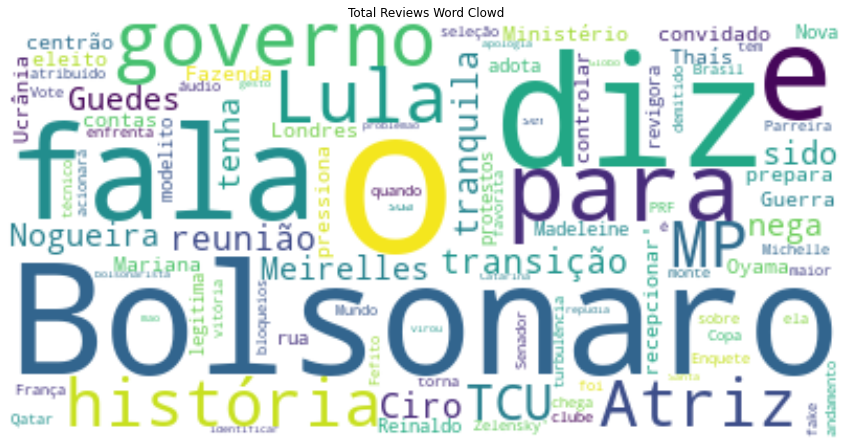

In [ ]:
# Import all necesary libraries
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)

# Add some extra words ad hoc for our purpose
app_words = ['na', 'que', 'de', 'não', 'em', 'quem', 'no',
             'se', 'da', 'por', 'deu', 'ao', 'nas', 'ele',
             'mas', 'após', 'um', 'dos', 'como', 'das']
stopwords.update(app_words)

# join all reviews
text = " ".join(review for review in news.text)

# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()

In [ ]:
sample_one = news.sample(5)
sample_one

In [ ]:
# Import all necesary libraries
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)

# Add some extra words ad hoc for our purpose
app_words = ['na', 'que', 'de', 'não', 'em', 'quem', 'no',
             'se', 'da', 'por', 'deu', 'ao', 'nas', 'ele',
             'mas', 'após', 'um', 'dos', 'como', 'das']
stopwords.update(app_words)

# join all reviews
text = " ".join(review for review in sample_one.text)

# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()